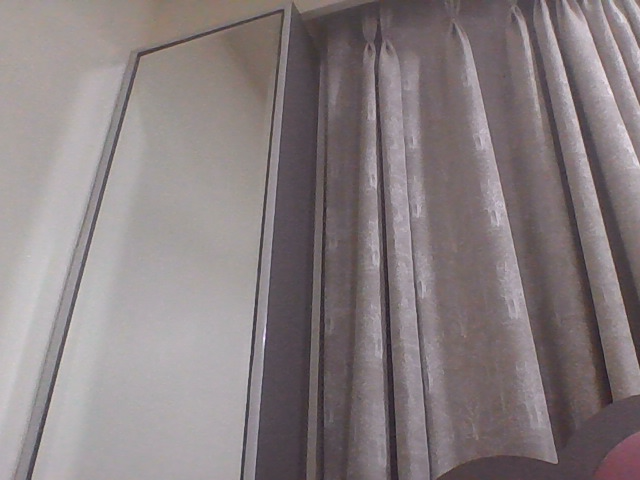

In [ ]:
!pip install opencv-python numpy


# In[ ]:


import cv2
import numpy as np
from IPython.display import display, clear_output

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the webcam
cap = cv2.VideoCapture(0)

def detect_faces():
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if not ret:
            print("Failed to grab frame")
            break

        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Convert frame to RGB and display it
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        display_image(frame_rgb)
        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

def display_image(image):
    """Displays the image in Jupyter Notebook."""
    from PIL import Image
    from io import BytesIO
    import IPython.display as display
    
    # Convert image to PIL format
    pil_image = Image.fromarray(image)
    
    # Convert PIL image to BytesIO object
    buf = BytesIO()
    pil_image.save(buf, format='PNG')
    
    # Display image
    display.display(display.Image(data=buf.getvalue()))
    clear_output(wait=True)

# Call the function to start face detection
detect_faces()


# In[ ]:




